<a href="https://colab.research.google.com/github/pavelperc/contest_results/blob/master/contest_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Инструкция
1. Откыть гугл таблицу по этой ссылке и положить туда список учеников в том порядке, в котором они должны быть в ведомости.
https://docs.google.com/spreadsheets/d/1eqQFYEoPRHAVErn-y7KhGDZvMFOWUtl1I79ALi_pxC4/edit?usp=sharing
2. Открыть в контесте раздел все посылки, потом дописать в строке url запроса &per-page=2000 (или больше)  
Пример:
https://contest.yandex.ru/admin/contest-submissions?contestId=11537&per-page=2000
3. Потом надо просто выделить всё через Ctrl+A и скопировать все результаты в строку ввода в ячейку ниже. Чтобы всё сработало нужен браузер **Google Chrome**, так как при копировании он вставляет табы между столбцами таблички.

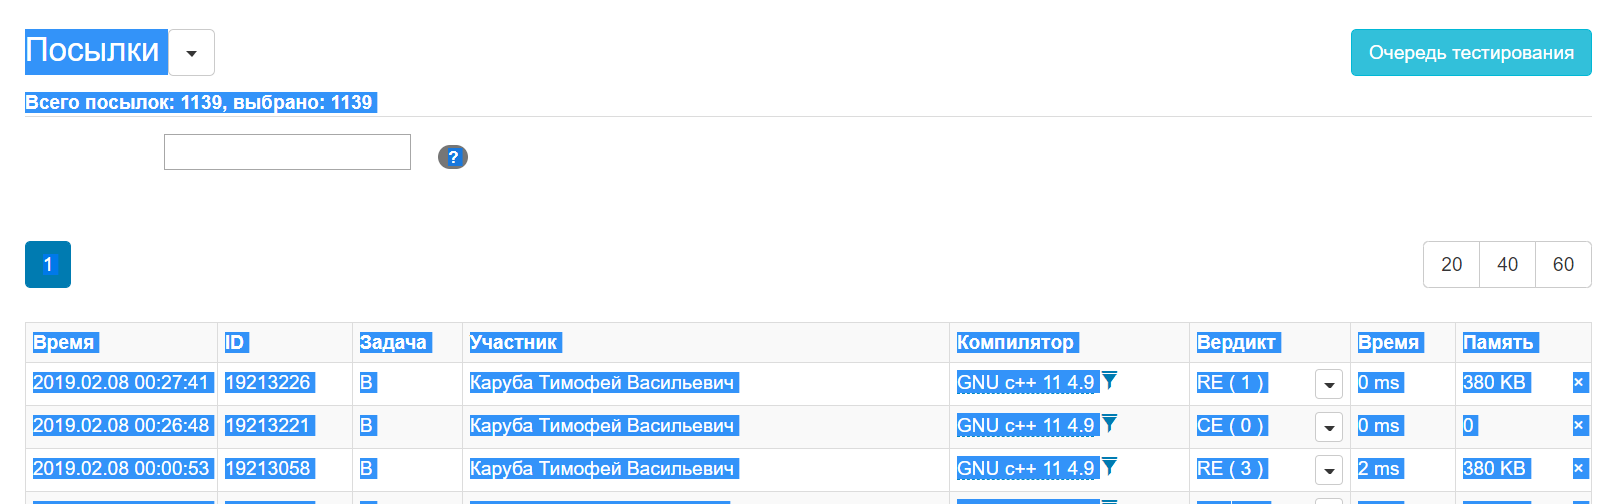

4. Начать выполнять все следующие ячейки. (Shift+Enter)
5. Вставить скопированные посылки в окно ввода.
5. Проверить лог на наличие строчек "not found: логин студента". Поиск студентов в списке и посылках идёт без учёта отчества.
6. Результаты будут скопированы **в буфер обмена** в виде таблицы, которая выведется в конце. В табличке будут ссылки на последнее OK решение студента, а если нет OK, то последнее вообще.
7. Вставить результаты в гугл-таблицу с ведомостью.

In [5]:
page = input('Paste page with all submissions from the clipboard:')

Paste page with all submissions from the clipboard:Я.Contest Турниры Соревнования Официальные Задачи Контент Пользователи 10 (ru) HSE BSE 2020 3 Быст... Монитор Страница Enter Условия Посылки Сообщения Отправить решение Участники Настройки соревнования Активных:0 0 Посылки Всего посылок: 1922, выбрано: 1922 ? 1 Время	ID	Задача	Участник	Компилятор	Вердикт	Время	Память 2020.02.15 00:16:42	30912383	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	23,42 s	6.9 MB× 2020.02.15 00:15:50	30912377	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	TL ( 8 )	25,07 s	4.1 MB× 2020.02.15 00:03:43	30912308	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	23,44 s	6.9 MB× 2020.02.15 00:01:32	30912301	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	TL ( 8 )	25,07 s	4.5 MB× 2020.02.15 00:00:40	30912293	A	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	291 ms	4 MB× 2020.02.15 00:00:15	30912291	C	Никольский Владислав Александрович	GNU c++ 11 4.9 	RE ( 1 )	0 ms	380 KB× 2020.02.15 00:00:08	30912289	C	Филонов Всеволод А

In [6]:
def cut_page(page):
    start = page.find('Время	ID')
    end = page.find('Отправить решение', start) - 3
    return page[start:end].replace('×', '\n').replace('Память ', 'Память\n')

table_str = cut_page(page)
print('string table start:')
print(table_str[:1000])

string table start:
Время	ID	Задача	Участник	Компилятор	Вердикт	Время	Память
2020.02.15 00:16:42	30912383	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	23,42 s	6.9 MB
 2020.02.15 00:15:50	30912377	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	TL ( 8 )	25,07 s	4.1 MB
 2020.02.15 00:03:43	30912308	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	23,44 s	6.9 MB
 2020.02.15 00:01:32	30912301	B	Шарипов Айнур Айварович	GNU c++ 11 4.9 	TL ( 8 )	25,07 s	4.5 MB
 2020.02.15 00:00:40	30912293	A	Шарипов Айнур Айварович	GNU c++ 11 4.9 	OK ( 0 )	291 ms	4 MB
 2020.02.15 00:00:15	30912291	C	Никольский Владислав Александрович	GNU c++ 11 4.9 	RE ( 1 )	0 ms	380 KB
 2020.02.15 00:00:08	30912289	C	Филонов Всеволод Андреевич	GNU c++ 11 4.9 	TL ( 1 )	1,09 s	184 KB
 2020.02.14 23:59:28	30912286	A	Шарипов Айнур Айварович	GNU c++ 11 4.9 	TL ( 7 )	396 ms	1.1 MB
 2020.02.14 23:58:53	30912284	C	Тимкин Дмитрий Сергеевич	GNU c++ 11 4.9 	TL ( 9 )	1,09 s	1.7 MB
 2020.02.14 23:58:45	30912281	B	Шарипов Айнур Айварови

In [14]:
from io import StringIO
import pandas as pd
import numpy as np

table = pd.read_csv(StringIO(table_str), sep='\t')

table = table[table.Задача != 'unknown']
# sort by time ascending
table = table.iloc[::-1]

tasks = table.Задача.unique()
print('tasks: ', tasks)
table.head(10)

tasks:  ['A' 'B' 'C']


,Время,ID,Задача,Участник,Компилятор,Вердикт,Время.1,Память
1921,2020.01.31 10:56:50,30572272,A,Сердюков Михаил Игоревич,GNU c++ 11 4.9,OK ( 0 ),321 ms,4 MB
1920,2020.01.31 10:59:18,30572332,B,Сердюков Михаил Игоревич,GNU c++ 11 4.9,ML ( 1 ),110 ms,129 MB
1919,2020.01.31 11:11:35,30572556,B,Сердюков Михаил Игоревич,GNU c++ 11 4.9,ML ( 8 ),"21,53 s",10 MB
1918,2020.01.31 11:14:09,30572596,B,Сердюков Михаил Игоревич,GNU c++ 11 4.9,ML ( 8 ),"21,23 s",10 MB
1917,2020.01.31 11:17:11,30572657,B,Сердюков Михаил Игоревич,GNU c++ 11 4.9,OK ( 0 ),"23,17 s",5 MB
1916,2020.01.31 11:20:46,30572716,B,Дубина Наталия Андреевна,GNU c++ 11 4.9,WA ( 2 ),2 ms,380 KB
1915,2020.01.31 11:38:18,30572980,B,Дубина Наталия Андреевна,GNU c++ 11 4.9,OK ( 0 ),289 ms,4 MB
1914,2020.01.31 11:39:09,30572988,A,Дубина Наталия Андреевна,GNU c++ 11 4.9,OK ( 0 ),290 ms,4 MB
1913,2020.01.31 11:50:45,30573173,A,Кукина Анастасия Игоревна,GNU c++ 11 4.9,ML ( 2 ),82 ms,117 MB
1912,2020.01.31 11:51:59,30573194,A,Кукина Анастасия Игоревна,GNU c++ 11 4.9,ML ( 2 ),91 ms,124 MB


In [25]:
# оставляем имя и фамилию, удаляем отчество
def trim_name(name):
    return ' '.join(name.split(' ')[:2])

import requests
r = requests.get('https://docs.google.com/spreadsheets/d/1eqQFYEoPRHAVErn-y7KhGDZvMFOWUtl1I79ALi_pxC4/export?format=csv&gid=0')
groups = pd.read_csv(StringIO(r.content.decode('utf-8')))

groups['name_trimmed'] = groups.name.apply(np.vectorize(trim_name))
groups = groups.set_index('name_trimmed')
groups.head()

,name
name_trimmed,
Барчук Ирина,Барчук Ирина Андреевна
Богданов Виктор,Богданов Виктор Алексеевич
Бондаренко Артём,Бондаренко Артём -
Глущенко Мария,Глущенко Мария Федоровна
Горушко Андрей,Горушко Андрей Александрович


In [0]:
def make_status(task):
    return 'status' + task

# adding empty columns for task and status

for task in tasks:
    groups[task] = ''    
for task in tasks:
    groups[make_status(task)] = ''

#iterate submissions
for index, row in table.iterrows():
    name = trim_name(row['Участник'])
    if name not in groups.index:
        print('not found:', name)
        continue

    task = row['Задача']
    task_id = row['ID']
    status = row['Вердикт'].split(' (')[0]
    task_link = np.NaN
    
    old_status = groups.at[name, make_status(task)]
    
    if old_status == 'OK' and status != 'OK':
#         print(f'skipped {status} after {old_status}: {name}')
        continue
    
#     if task_id != None:
#         task_id = int(task_id)
    task_link = f'https://contest.yandex.ru/admin/run-report?id={task_id}'
    
    groups.at[name, task] = task_link
    groups.at[name,make_status(task)] = status
#     groups.at[name, task] = task_id

In [0]:
final = groups.filter(['name'] + tasks + list(map(make_status, tasks)))
final.set_index('name', inplace=True)
final.to_clipboard()
final

,A,B,C,statusA,statusB,statusC
name,,,,,,
Барчук Ирина Андреевна,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,OK,OK,OK
Богданов Виктор Алексеевич,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,,OK,OK,
Бондаренко Артём -,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,OK,OK,OK
Глущенко Мария Федоровна,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,OK,OK,OK
Горушко Андрей Александрович,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,,OK,OK,
Дубинский Роман Вячеславович,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,,OK,OK,
Закируллин Даниил Римович,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,OK,OK,OK
Зиятдинов Тимур Айратович,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,,OK,OK,
Золотухина Анастасия Сергеевна,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,https://contest.yandex.ru/admin/run-report?id=...,OK,OK,OK
